# **Upload The Dataset**

In [ ]:
from zipfile import ZipFile
file_name = "papaya.zip"
 
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done !")

Done !


# **Remove the unzip file**




In [ ]:
#rm -rf dataset

# **Imported needed packages**



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

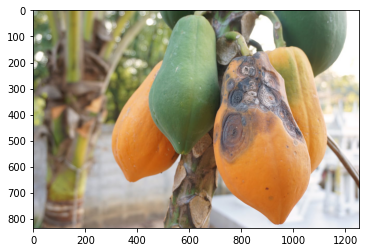

In [ ]:
img= image.load_img("dataset/training/anthracnose/a1.jpg")
plt.imshow(img)

In [ ]:
cv2.imread("dataset/training/anthracnose/a1.jpg")

array([[[161, 142, 107],
        [161, 142, 107],
        [161, 143, 106],
        ...,
        [ 69,  92, 108],
        [ 71,  91, 108],
        [ 71,  91, 108]],

       [[161, 142, 107],
        [161, 142, 107],
        [161, 143, 106],
        ...,
        [ 68,  91, 107],
        [ 70,  90, 107],
        [ 70,  90, 107]],

       [[161, 142, 107],
        [161, 142, 107],
        [161, 143, 106],
        ...,
        [ 67,  90, 106],
        [ 69,  89, 106],
        [ 69,  89, 106]],

       ...,

       [[123, 104,  89],
        [124, 105,  90],
        [124, 108,  92],
        ...,
        [ 47,  28,  20],
        [ 45,  26,  18],
        [ 43,  24,  16]],

       [[123, 104,  89],
        [124, 105,  90],
        [124, 108,  92],
        ...,
        [ 46,  27,  19],
        [ 42,  23,  15],
        [ 40,  21,  13]],

       [[123, 104,  89],
        [124, 105,  90],
        [124, 108,  92],
        ...,
        [ 46,  27,  19],
        [ 42,  23,  15],
        [ 40,  21,  13]]

In [ ]:
cv2.imread("dataset/training/anthracnose/a1.jpg").shape

(292, 448, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


# **Train and Validation the Dataset**

In [ ]:
train_dataset = train.flow_from_directory(
    'dataset/training/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')

validation_dataset = validation.flow_from_directory(
    'dataset/validation/',
    target_size=(200,200),
    batch_size = 3,
    class_mode = 'binary')


Found 165 images belonging to 5 classes.
Found 49 images belonging to 5 classes.


# **Creating CNN model Using Keras API module**

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(200, 200, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(132,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    
                                    tf.keras.layers.Dense(1, activation='sigmoid'),   #softmax
])

# **Compile the model**

In [ ]:
model.compile(loss = 'binary_crossentropy',  #categorical_crossentropy
              optimizer = RMSprop(lr=0.001),
              metrics = ['accuracy'])

# **Fit the model for Accuracy checking**

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch=3,
                      epochs= 30,
                      validation_data = validation_dataset)

Epoch 1/30
3/3 [==============================] - 2s 770ms/step - loss: -28.2361 - accuracy: 0.1111 - val_loss: -329.9211 - val_accuracy: 0.1633
Epoch 2/30
3/3 [==============================] - 2s 729ms/step - loss: -1221.3370 - accuracy: 0.1111 - val_loss: -6377.8687 - val_accuracy: 0.1633
Epoch 3/30
3/3 [==============================] - 2s 735ms/step - loss: -16778.4277 - accuracy: 0.2222 - val_loss: -48893.0195 - val_accuracy: 0.1633
Epoch 4/30
3/3 [==============================] - 2s 726ms/step - loss: -128037.4141 - accuracy: 0.1111 - val_loss: -202717.0625 - val_accuracy: 0.1633
Epoch 5/30
3/3 [==============================] - 2s 724ms/step - loss: -203453.9062 - accuracy: 0.0000e+00 - val_loss: -380444.8125 - val_accuracy: 0.1633
Epoch 6/30
3/3 [==============================] - 2s 733ms/step - loss: -258932.8125 - accuracy: 0.1111 - val_loss: -615756.4375 - val_accuracy: 0.1633
Epoch 7/30
3/3 [==============================] - 2s 727ms/step - loss: -33956.9180 - accuracy: 0

In [ ]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test_dataset)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

In [ ]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# `Accuracy Graph`

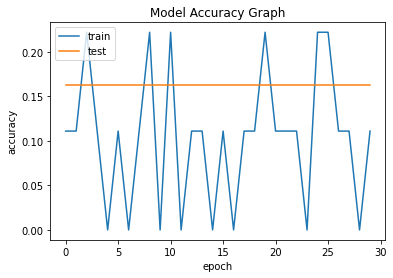

In [ ]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title("Model Accuracy Graph")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss Graph

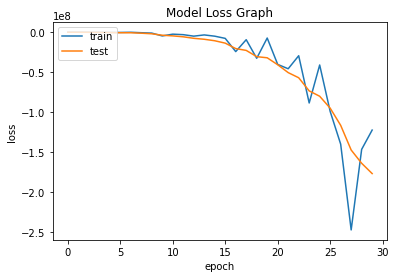

In [ ]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title("Model Loss Graph")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
validation_dataset.class_indices

{'anthracnose': 0,
 'black_spot': 1,
 'phytophthora': 2,
 'powdery_mildew': 3,
 'ring_spot': 4}

# **Testing the dataset**

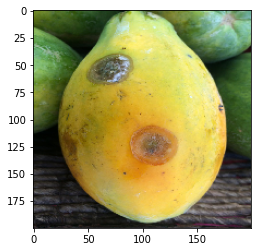

Black Spot !


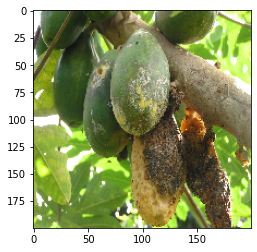

Black Spot !


In [ ]:
dir_path = 'dataset/testing'

for i in os.listdir(dir_path):
  img = image.load_img(dir_path+"//"+i, target_size=(200,200,3))
  plt.imshow(img)
  plt.show()

  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)
  images = np.vstack([X])
  val = model.predict(images)
  if val == 0:
    print("Anthracnose !")
  elif val == 1:
    print("Black Spot !")
  elif val == 2:
    print("Phytophthora !")
  elif val == 3:
    print("Powdery Mildew !")
  elif val == 4:
    print("Ring Spot !")